In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

In [3]:
### Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [6]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4.1-nano")
# llm.invoke("hell")

In [7]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="llama-3.3-70b-versatile")
llm_groq.invoke("hi I am sachchida. I am AI enthusiast")

AIMessage(content="Hello Sachchida, nice to meet you. It's great to hear that you're an AI enthusiast. Artificial Intelligence is a fascinating field that's constantly evolving and has the potential to revolutionize many aspects of our lives. What specifically interests you about AI? Are you exploring machine learning, natural language processing, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 46, 'total_tokens': 113, 'completion_time': 0.184914447, 'prompt_time': 0.002349316, 'queue_time': 0.04873589, 'total_time': 0.187263763}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--22d2e65c-e0ad-44f0-93f3-a4158bd27d85-0', usage_metadata={'input_tokens': 46, 'output_tokens': 67, 'total_tokens': 113})

In [8]:
def superbot(state:State):
    return {"messages": llm_groq.invoke(state["messages"])}

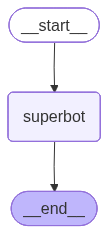

In [9]:
from IPython.display import Image,display
graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)
graph_builder=graph.compile()
## display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
graph_builder.invoke({'messages':'Hi My Nameis Sachchida I like cricket and I am an AI enthusiast'})

{'messages': [HumanMessage(content='Hi My Nameis Sachchida I like cricket and I am an AI enthusiast', additional_kwargs={}, response_metadata={}, id='feb999d9-3707-49f4-9b05-fb69dc3f7b8b'),
  AIMessage(content="Nice to meet you, Sachchida. It's great to hear that you're passionate about cricket and AI. Cricket is an exciting sport with a huge following worldwide, and AI is a rapidly evolving field with many interesting applications.\n\nAs an AI enthusiast, you might be interested to know that AI and machine learning are being increasingly used in cricket to improve player performance, analyze games, and even predict outcomes. For example, AI-powered systems can analyze a player's batting or bowling technique, providing insights to help them improve. AI can also be used to analyze large amounts of data from past games to identify patterns and trends, which can inform coaching decisions and strategy.\n\nWhat aspect of AI are you most interested in, Sachchida? Are you more into the techni

### Because we are usign reducers Human message and AIMessage both are appeneded in messages

### Streaming the responses

In [11]:
graph_builder.stream({"messages":"Hello"})

<generator object Pregel.stream at 0x32bbdc0>

In [12]:
for event in graph_builder.stream({"messages":"Hi This side Sachchida"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hi This side Sachchida', additional_kwargs={}, response_metadata={}, id='59a549dc-24a5-4d68-affa-bdbcfa39648e')]}
{'messages': [HumanMessage(content='Hi This side Sachchida', additional_kwargs={}, response_metadata={}, id='59a549dc-24a5-4d68-affa-bdbcfa39648e'), AIMessage(content='Hello Sachchida, how can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 41, 'total_tokens': 54, 'completion_time': 0.030388832, 'prompt_time': 0.00204889, 'queue_time': 0.048454696, 'total_time': 0.032437722}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c48df75e-10f4-4e89-a782-977a69d2a490-0', usage_metadata={'input_tokens': 41, 'output_tokens': 13, 'total_tokens': 54})]}


In [13]:
### Stream mode update
for event in graph_builder.stream({"messages":"Hi This side Sachchida"},stream_mode="updates"):
    print(event)

{'superbot': {'messages': AIMessage(content='Hello Sachchida, how are you today? Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 41, 'total_tokens': 67, 'completion_time': 0.072292804, 'prompt_time': 0.001880715, 'queue_time': 0.048391305, 'total_time': 0.074173519}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--451260d1-11e2-4f8b-be01-befae83fe0bb-0', usage_metadata={'input_tokens': 41, 'output_tokens': 26, 'total_tokens': 67})}}


##### Tool calling

In [14]:
def add(a:int, b:int)-> int:
    """ Add a and b
    Args:
        a (int) first int
        b (int) second int

        Returns:
            int
    """
    print("a->",a)
    print("b->",b)
    return a+b

### binding tool with llm

In [15]:
from langchain_core.messages import HumanMessage,AIMessage

In [16]:
llm_with_tool=llm.bind_tools([add])
tool_call=llm_with_tool.invoke([HumanMessage(content=f"What is 2 plus 2",name="Sachi")])

In [17]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'call_BhgifDRiaMedsO3usBheZDXt',
  'type': 'tool_call'}]

### Messages as State

In [18]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    # name:str



### Reducers with add_messages

In [19]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="Sachi"))
initial_messages

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Sachi')]

In [20]:
ai_message=AIMessage(content=f"which programming language you want to learn",name="LLMModel")
ai_message

AIMessage(content='which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel')

In [21]:
### usign reducer add_message
### Reducers is used to append instaed of override
add_messages(initial_messages,ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLModel', id='6496c982-a04e-4a4f-8845-75cf3f1743b4'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Sachi', id='a09525c4-ea5b-4ddf-a265-a78eb5ba6df5'),
 AIMessage(content='which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='8bc619d4-d064-4b8f-a606-e5818dcdbc13')]

### chatbot node functionality

In [33]:
def llm_tool(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [34]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)
builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)

graph=builder.compile()

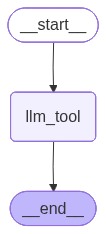

In [35]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
from pprint import pprint, PrettyPrinter

In [37]:
### Invocation
messages=graph.invoke({"messages":"what is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

what is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (call_9LarSzKrOlNr8Ic3TSt23nor)
 Call ID: call_9LarSzKrOlNr8Ic3TSt23nor
  Args:
    a: 2
    b: 2


In [38]:
tools=[add]

In [40]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
builder=StateGraph(State)

## Add nodes
builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))
## Add Edges
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges("llm_tool",tools_condition)
### If the latest message (result) from assistant is a tool call -> tool_condition routes to tool
### if the latest message (result) from assistant is not a tool call -> tool condition rountes to END
builder.add_edge("tools",END)
graph_tool=builder.compile()


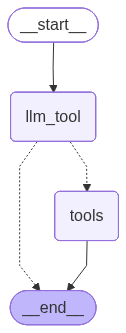

In [41]:
display(Image(graph_tool.get_graph().draw_mermaid_png()))

In [42]:
### Invocation
messages=graph_tool.invoke({"messages":"what is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

a-> 2
b-> 2
================================ Human Message =================================

what is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (call_IwPdyMvhdW8dsbFlur3gPfZC)
 Call ID: call_IwPdyMvhdW8dsbFlur3gPfZC
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [43]:
### Invocation
messages=graph_tool.invoke({"messages":"what is machine learning"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

what is machine learning
================================== Ai Message ==================================

Machine learning is a branch of artificial intelligence (AI) that focuses on developing algorithms and statistical models that enable computers to learn from and make decisions or predictions based on data. Instead of being explicitly programmed for every task, machine learning systems identify patterns and relationships in data to improve their performance over time. Applications include image recognition, natural language processing, recommendation systems, and many others.
